In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from bs4 import BeautifulSoup

#url = "http://www.hubertiming.com/results/2017GPTR10K"
url = "https://www.hubertiming.com/results/2023WyEasterLong"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [167]:
# Get the title
title = soup.title
print(title)


<title>Race results for the 2023 Wy'Easter Skimo Race!</title>


In [168]:
# Print out the text
text = soup.get_text()
#print(soup.text)
soup.find_all('a')

[<a href="https://www.snowgoatskimo.com/" target="_blank">Snowgoat Skimo</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-info btn-sm" href="https://photos.google.com/share/AF1QipOH1NdRAy6eTU48sA9TjVQm8TtfJdINxX2YFsfvrM0NvHZYi76cLSTJO-A0H87fcQ?key=UnMzVnlKUG9BZF9rdk1zS21EVVI5dlU5VVBhNmdB" id="photo1Btn" role="button" target="_new"><i class="fas fa-camera"></i> Race Photos</a>,
 <a href="https://www.teresadalsager.com/">Teresa Dalsager</a>,
 <a class="btn btn-primary btn-lg" href="/results/2023WyEaster" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> Vertical - Open</a>,
 <a class="btn btn-primary btn-lg" href="/results/2023WyEasterVertHM" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> Vertical - Heavy Mettle</a>,
 <a class="btn btn-primary btn-lg" href="/results/2023WyEasterLongHM" role="button

In [169]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

https://www.snowgoatskimo.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
https://photos.google.com/share/AF1QipOH1NdRAy6eTU48sA9TjVQm8TtfJdINxX2YFsfvrM0NvHZYi76cLSTJO-A0H87fcQ?key=UnMzVnlKUG9BZF9rdk1zS21EVVI5dlU5VVBhNmdB
https://www.teresadalsager.com/
/results/2023WyEaster
/results/2023WyEasterVertHM
/results/2023WyEasterLongHM
/results/2023WyEasterLongSplitmo
/results/2023WyEasterShort
/results/summary/2023WyEasterLong
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [170]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>Long - Open:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>18</td>
</tr>, <tr>
<td>Male:</td>
<td>11</td>
</tr>, <tr>
<td>Female:</td>
<td>6</td>
</tr>, <tr>
<td>Non-Binary:</td>
<td>1</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
</tr>, <tr data-bib="345">
<td>1</td>
<td>345</td>
<td>

                    ZACH VIOLETT

                </td>
<td>M</td>
<td>40</td>
<td>BEND</td>
<td>OR</td>
<td>1:33:19</td>
<td>

                    1 of 11

                </td>
<td>M 40-44</td>
<td>

                    1 of 2

                </td>
</tr>, <tr data-bib="335">
<td>2</td>
<td>335</td>
<td>

                    KYLEE ROOD

                </td>
<td>O</td>
<td>34</td>
<td>BEND</td>
<td>OR</td>
<td>1:42:56</td>
<td>

                    1 of 1

                </td>
<td>O 30-34</td>
<td>

                    1 o

In [171]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>18</td>, <td>338</td>, <td>

                    OLIVIA SPADOLA

                </td>, <td>F</td>, <td>27</td>, <td>PORTLAND</td>, <td>OR</td>, <td>3:27:28</td>, <td>

                    6 of 6

                </td>, <td>F 25-29</td>, <td>

                    2 of 2

                </td>]


bs4.element.ResultSet

In [172]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[18, 338, 

                    OLIVIA SPADOLA

                , F, 27, PORTLAND, OR, 3:27:28, 

                    6 of 6

                , F 25-29, 

                    2 of 2

                ]


In [173]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[18, 338, 

                    OLIVIA SPADOLA

                , F, 27, PORTLAND, OR, 3:27:28, 

                    6 of 6

                , F 25-29, 

                    2 of 2

                ]


str

In [174]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 18]"
2,"[Male:, 11]"
3,"[Female:, 6]"
4,"[Non-Binary:, 1]"
5,[]
6,"[1, 345, \r\n\r\n ZACH VIOL..."
7,"[2, 335, \r\n\r\n KYLEE ROO..."
8,"[3, 323, \r\n\r\n ZEBEDIAH ..."
9,"[4, 308, \r\n\r\n DAVID GRI..."


In [175]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,[],None,None,None,None,None,None,None,None,None,None
1,[Finishers:,18],None,None,None,None,None,None,None,None,None
2,[Male:,11],None,None,None,None,None,None,None,None,None
3,[Female:,6],None,None,None,None,None,None,None,None,None
4,[Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,[],None,None,None,None,None,None,None,None,None,None
6,[1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,[2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,[3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,[4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...


In [176]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None
4,Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...


In [177]:
col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, Age, City, State, Time, Gender Place, Age Group, Age Group Place]']


In [178]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, Age, City, State, T..."


In [179]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8,9,10
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]


In [180]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None
4,Non-Binary:,1],None,None,None,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...


In [181]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
0,],None,None,None,None,None,None,None,None,None,None
1,Finishers:,18],None,None,None,None,None,None,None,None,None
2,Male:,11],None,None,None,None,None,None,None,None,None
3,Female:,6],None,None,None,None,None,None,None,None,None


In [182]:

df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   [Place             25 non-null     object
 1    Bib               23 non-null     object
 2    Name              19 non-null     object
 3    Gender            19 non-null     object
 4    Age               19 non-null     object
 5    City              19 non-null     object
 6    State             19 non-null     object
 7    Time              19 non-null     object
 8    Gender Place      19 non-null     object
 9    Age Group         19 non-null     object
 10   Age Group Place]  19 non-null     object
dtypes: object(11)
memory usage: 2.3+ KB


(25, 11)

In [183]:

df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   [Place             19 non-null     object
 1    Bib               19 non-null     object
 2    Name              19 non-null     object
 3    Gender            19 non-null     object
 4    Age               19 non-null     object
 5    City              19 non-null     object
 6    State             19 non-null     object
 7    Time              19 non-null     object
 8    Gender Place      19 non-null     object
 9    Age Group         19 non-null     object
 10   Age Group Place]  19 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


(19, 11)

In [184]:

df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [185]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [186]:
print(df7.columns.tolist())

df7[' Age Group'] = df7[' Age Group'].str.strip(']')
df7.head()


['Place', ' Bib', ' Name', ' Gender', ' Age', ' City', ' State', ' Time', ' Gender Place', ' Age Group', ' Age Group Place]']


,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place]
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...


In [187]:
# Strip leading/trailing spaces from column names
df7.columns = df7.columns.str.strip()

# Get the 'Time' column
time_list = df7['Time'].tolist()

# Convert times to total minutes (handles both MM:SS and HH:MM:SS)
time_mins = []
for i in time_list:
    parts = i.split(':')
    if len(parts) == 3:
        h, m, s = parts
    elif len(parts) == 2:
        h = 0
        m, s = parts
    else:
        continue  # skip if format is unexpected
    total_minutes = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
    time_mins.append(total_minutes)

#print(time_mins)  # Uncomment to see the result
df7['Runner_mins'] = time_mins
df7.head()



,Place,Bib,Name,Gender,Age,City,State,Time,Gender Place,Age Group,Age Group Place],Runner_mins
6,1,345,\r\n\r\n ZACH VIOLETT\r\n\...,M,40,BEND,OR,1:33:19,\r\n\r\n 1 of 11\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 2\r\n\r\n ...,93.316667
7,2,335,\r\n\r\n KYLEE ROOD\r\n\r\...,O,34,BEND,OR,1:42:56,\r\n\r\n 1 of 1\r\n\r\n ...,O 30-34,\r\n\r\n 1 of 1\r\n\r\n ...,102.933333
8,3,323,\r\n\r\n ZEBEDIAH MILLSLAG...,M,25,BEND,OR,1:52:07,\r\n\r\n 2 of 11\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 2\r\n\r\n ...,112.116667
9,4,308,\r\n\r\n DAVID GRIFFIN\r\n...,M,35,SEATTLE,WA,1:53:10,\r\n\r\n 3 of 11\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 2\r\n\r\n ...,113.166667
10,5,326,\r\n\r\n ADAM NILSEN\r\n\r...,M,30,PORTLAND,OR,1:54:57,\r\n\r\n 4 of 11\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 2\r\n\r\n ...,114.950000


In [188]:
df7.describe(include=[np.number])

,Runner_mins
count,18.000000
mean,137.012963
std,31.173269
min,93.316667
25%,115.216667
50%,128.700000
75%,156.500000
max,207.466667


In [189]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

([<matplotlib.axis.XTick at 0x12f93f750>], [Text(1, 0, 'Runners')])

/var/folders/jr/kxz75ntd2sb_gh9s2lkrbb240000gn/T/ipykernel_45989/3905679130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


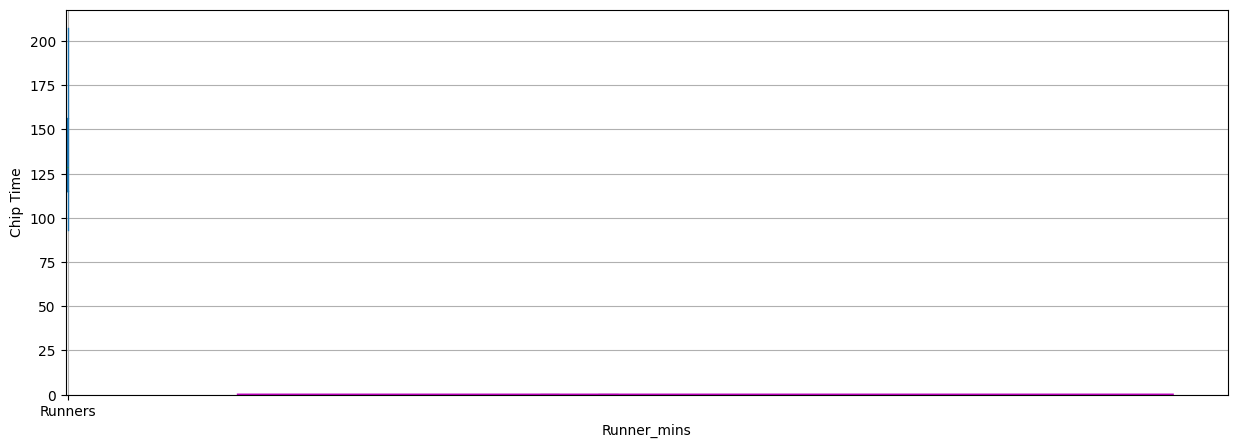

In [190]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


/var/folders/jr/kxz75ntd2sb_gh9s2lkrbb240000gn/T/ipykernel_45989/1575091003.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


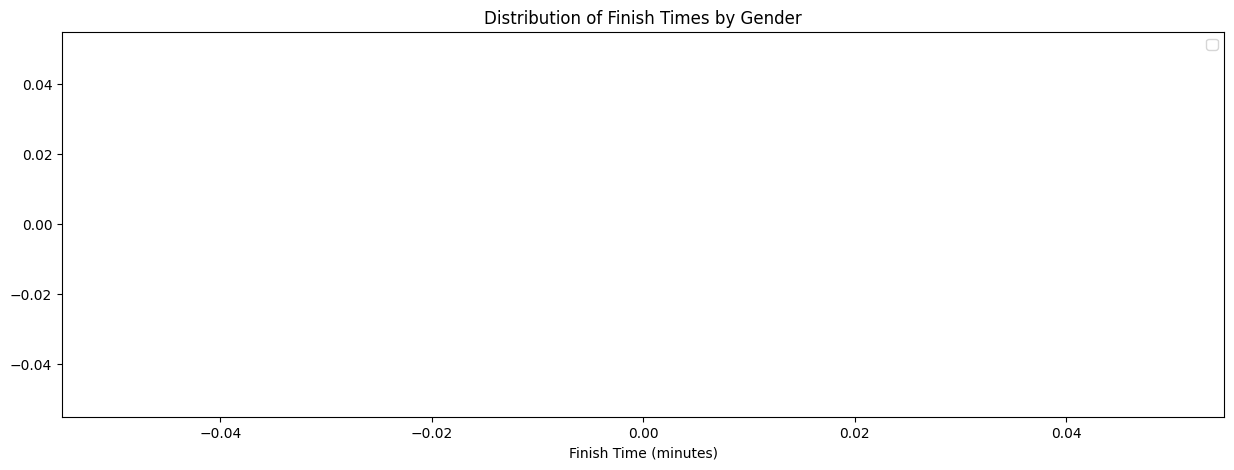

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Female: histogram + KDE
sns.histplot(f_fuko, kde=True, stat="density", label='Female', edgecolor='black')

# Plot Male: KDE only
sns.kdeplot(m_fuko, label='Male')

# Final plot details
plt.legend()
plt.xlabel('Finish Time (minutes)')
plt.title('Distribution of Finish Times by Gender')
plt.show()


In [192]:
g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)


       Runner_mins                                                             \
             count        mean        std         min         25%         50%   
Gender                                                                          
F              6.0  153.494444  32.681316  116.016667  132.150000  150.516667   
M             11.0  131.121212  28.296109   93.316667  114.058333  127.283333   
O              1.0  102.933333        NaN  102.933333  102.933333  102.933333   

                                
               75%         max  
Gender                          
F       165.445833  207.466667  
M       129.833333  185.416667  
O       102.933333  102.933333  


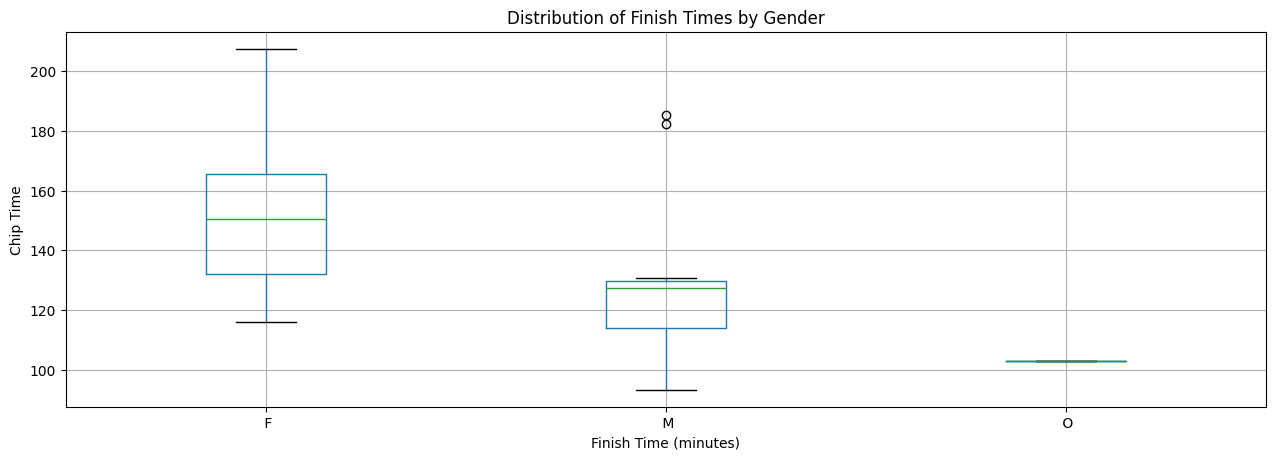

In [193]:
df7.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.suptitle("")
# Final plot details
plt.xlabel('Finish Time (minutes)')
plt.title('Distribution of Finish Times by Gender')
plt.show()


